# Ethereum Blockchain

In [359]:
#import packages
import google.auth
from google.cloud import bigquery
from google.cloud import bigquery_storage
from google.cloud import storage
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
import numpy as np
import seaborn as sns

## Importing Data

### Connecting to Google Big Query

In [17]:
'''
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="googlecreds.json"
'''

In [20]:
'''
def implicit():
    from google.cloud import storage

    # If you don't specify credentials when constructing the client, the
    # client library will look for credentials in the environment.
    storage_client = storage.Client()

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)
    
implicit
'''

<function __main__.implicit()>

In [21]:
'''
# Explicitly create a credentials object. This allows you to use the same
# credentials for both the BigQuery and BigQuery Storage clients, avoiding
# unnecessary API calls to fetch duplicate authentication tokens.
credentials, your_project_id = google.auth.default(
    scopes=["https://www.googleapis.com/auth/cloud-platform"]
)

# Make clients.
bqclient = bigquery.Client(credentials=credentials, project=your_project_id,)
bqstorageclient = bigquery_storage.BigQueryReadClient(credentials=credentials)
'''

In [27]:
'''
# Download a table.
table = bigquery.TableReference.from_string(
    "bigquery-public-data.utility_us.country_code_iso"
)
rows = bqclient.list_rows(
    table,
    selected_fields=[
        bigquery.SchemaField("country_name", "STRING"),
        bigquery.SchemaField("fips_code", "STRING"),
    ],
)
df = rows.to_dataframe(bqstorage_client=bqstorageclient)
print(df.head())
'''

       country_name fips_code
0          Akrotiri        AX
1   Bassas da India        BS
2          Dhekelia        DX
3     Europa Island        EU
4  Glorioso Islands        GO


### Download Ethereum Data

In [40]:
'''
# Download a table.
table = bigquery.TableReference.from_string(
    "bigquery-public-data.crypto_ethereum.tokens"
)
rows = bqclient.list_rows(
    table,
    selected_fields=[
        bigquery.SchemaField("address", "STRING"),
        bigquery.SchemaField("symbol", "STRING"),
        bigquery.SchemaField("name", "STRING"),
        bigquery.SchemaField("decimals", "INTEGER"),
        bigquery.SchemaField("total_supply", "FLOAT"),
        bigquery.SchemaField("block_timestamp", "TIMESTAMP"),
        bigquery.SchemaField("block_number", "INTEGER"),
        bigquery.SchemaField("block_hash", "STRING")
    ],
)
df_raw = rows.to_dataframe(bqstorage_client=bqstorageclient)
print(df_raw.head())
'''

                                      address  symbol  \
0  0x89a93d7631c9b2d061e706ebec4631105d39696f   HUBOO   
1  0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7    E‍TH   
2  0xe5ab497b73cfb287d617fc75a7afbdd63b66bdbd      we   
3  0x8c5029cf4935f584f10c4a4cc077d4b3d51a2da7    BT‍C   
4  0xd9180aeda97a613edc2be2affc77f8569d48680c  SkyNet   

                             name decimals              total_supply  \
0                        Hubloons        2              100000000000   
1                       Eth‍ereum        6          1111111111000000   
2                       We Invest        6           100000000000000   
3                        Bit‍coin        6          7777777777000000   
4  SkyNet Artificial Intelligence        9  100000000000000000000000   

            block_timestamp  block_number  \
0 2021-06-17 09:50:43+00:00      12651249   
1 2021-06-17 09:01:39+00:00      12651029   
2 2021-06-17 07:23:41+00:00      12650588   
3 2021-06-17 08:18:31+00:00      12650845   

In [41]:
'''
df_raw.to_csv("bigquery_ethereum_tokens.csv",index=False)
'''

In [43]:
df = pd.read_csv("bigquery_ethereum_tokens.csv")
df.head()

,address,symbol,name,decimals,total_supply,block_timestamp,block_number,block_hash
0,0x89a93d7631c9b2d061e706ebec4631105d39696f,HUBOO,Hubloons,2.0,100000000000,2021-06-17 09:50:43+00:00,12651249,0x0b41a149b791b5872751cf43a5d16293e5fe7ff3deae...
1,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7,E‍TH,Eth‍ereum,6.0,1111111111000000,2021-06-17 09:01:39+00:00,12651029,0x4eb60e7db7450e8a26b8245446a63d15f8c841a49fcd...
2,0xe5ab497b73cfb287d617fc75a7afbdd63b66bdbd,we,We Invest,6.0,100000000000000,2021-06-17 07:23:41+00:00,12650588,0xba2e8659e59414becb6add2d47cc69dcb032e69842a2...
3,0x8c5029cf4935f584f10c4a4cc077d4b3d51a2da7,BT‍C,Bit‍coin,6.0,7777777777000000,2021-06-17 08:18:31+00:00,12650845,0x6082b63148607cb32bbb49c64e0c52cd6cd517c8938e...
4,0xd9180aeda97a613edc2be2affc77f8569d48680c,SkyNet,SkyNet Artificial Intelligence,9.0,100000000000000000000000,2021-06-17 06:33:22+00:00,12650355,0x80d8ed72d81753145a24831b779b927de300dc744f28...


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204159 entries, 0 to 204158
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   address          204159 non-null  object 
 1   symbol           186851 non-null  object 
 2   name             187626 non-null  object 
 3   decimals         191196 non-null  float64
 4   total_supply     199312 non-null  object 
 5   block_timestamp  204159 non-null  object 
 6   block_number     204159 non-null  int64  
 7   block_hash       204159 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 12.5+ MB


### Get Token Info

In [171]:
'''token_data =list() #list to store token data in
completed =0 #keep track of number of completed calls
command = "/getTokenInfo/" #command to query info for 

#get informatio for all adresses in token dataset
for add in df['address']:
    #send in api request
    url = "https://api.ethplorer.io" +command + add+"?apiKey=EK-rVgkf-JBEdqCf-fNdEY"
    response = requests.get(url)
    
    #check for error
    addto = True
    for key in response.json().keys():
        if key =='error':
            addto=False
    
    #only save data if error not raised
    if addto:
        token_data.append(response.json())
    
    #give profress report
    completed+=1
    if completed%1000==0:
        print(str(round(completed/len(df)*100,4))+"% complete")
        
    time.sleep(.11)
        
print('done')'''

0.4898% complete
0.9796% complete
1.4694% complete
1.9593% complete
2.4491% complete
2.9389% complete
3.4287% complete
3.9185% complete
4.4083% complete
4.8981% complete
5.388% complete
5.8778% complete
6.3676% complete
6.8574% complete
7.3472% complete
7.837% complete
8.3268% complete
8.8167% complete
9.3065% complete
9.7963% complete
10.2861% complete
10.7759% complete
11.2657% complete
11.7555% complete
12.2454% complete
12.7352% complete
13.225% complete
13.7148% complete
14.2046% complete
14.6944% complete
15.1842% complete
15.6741% complete
16.1639% complete
16.6537% complete
17.1435% complete
17.6333% complete
18.1231% complete
18.6129% complete
19.1028% complete
19.5926% complete
20.0824% complete
20.5722% complete
21.062% complete
21.5518% complete
22.0416% complete
22.5315% complete
23.0213% complete
23.5111% complete
24.0009% complete
24.4907% complete
24.9805% complete
25.4703% complete
25.9602% complete
26.45% complete
26.9398% complete
27.4296% complete
27.9194% complete


In [173]:
'''df_2 =pd.DataFrame(token_data)
df_2.head()'''

,address,decimals,name,symbol,totalSupply,transfersCount,lastUpdated,issuancesCount,holdersCount,ethTransfersCount,...,telegram,twitter,image,reddit,coingecko,estimatedDecimals,publicTags,links,alert,meta
0,0x89a93d7631c9b2d061e706ebec4631105d39696f,2,Hubloons,HUBOO,100000000000,1,1.623924e+09,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7,6,Eth‍ereum,E‍TH,1111111111000000,3,1.623926e+09,0,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0x8c5029cf4935f584f10c4a4cc077d4b3d51a2da7,6,Bit‍coin,BT‍C,7777777777000000,2,1.623921e+09,0,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0xd9180aeda97a613edc2be2affc77f8569d48680c,9,SkyNet Artificial Intelligence,SkyNet,100000000000000000000000,17,1.623970e+09,0,10,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x5a9d948bd64e36df3a10620ee766562d77630cfc,18,KingDom Inu,Kingdom,1000000000000000000000000000000000,24,1.623928e+09,0,15,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
'''df_2.to_csv('ethplorer_token_data.csv',index=False)'''

In [250]:
df_2 = pd.read_csv("ethplorer_token_data.csv")
df_2.head()

/usr/local/etc/anaconda3/envs/blockchain/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,address,decimals,name,symbol,totalSupply,transfersCount,lastUpdated,issuancesCount,holdersCount,ethTransfersCount,...,telegram,twitter,image,reddit,coingecko,estimatedDecimals,publicTags,links,alert,meta
0,0x89a93d7631c9b2d061e706ebec4631105d39696f,2,Hubloons,HUBOO,100000000000,1,1.623924e+09,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7,6,Eth‍ereum,E‍TH,1111111111000000,3,1.623926e+09,0,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0x8c5029cf4935f584f10c4a4cc077d4b3d51a2da7,6,Bit‍coin,BT‍C,7777777777000000,2,1.623921e+09,0,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0xd9180aeda97a613edc2be2affc77f8569d48680c,9,SkyNet Artificial Intelligence,SkyNet,100000000000000000000000,17,1.623970e+09,0,10,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x5a9d948bd64e36df3a10620ee766562d77630cfc,18,KingDom Inu,Kingdom,1000000000000000000000000000000000,24,1.623928e+09,0,15,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135537 entries, 0 to 135536
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   address            135537 non-null  object 
 1   decimals           135537 non-null  object 
 2   name               135484 non-null  object 
 3   symbol             135537 non-null  object 
 4   totalSupply        135532 non-null  object 
 5   transfersCount     135537 non-null  int64  
 6   lastUpdated        134800 non-null  float64
 7   issuancesCount     135537 non-null  int64  
 8   holdersCount       135537 non-null  int64  
 9   ethTransfersCount  135533 non-null  float64
 10  price              135537 non-null  object 
 11  countOps           135537 non-null  int64  
 12  owner              127405 non-null  object 
 13  description        570 non-null     object 
 14  website            3086 non-null    object 
 15  totalIn            1357 non-null    float64
 16  to

### Get Transaction Info

In [199]:
'''token_data =list() #list to store token data in
completed =0 #keep track of number of completed calls
command = "/getTokenHistory/" #command to query info for 
params = "&limit=1000"

#get informatio for all adresses in token dataset
for add in df_2['address']:
    #send in api request
    url = "https://api.ethplorer.io" +command + add+"?apiKey=EK-rVgkf-JBEdqCf-fNdEY"+params
    response = requests.get(url)
    
    #check for error
    addto = True
    for key in response.json().keys():
        if key =='error':
            addto=False
    
    #only save data if error not raised
    if addto:
        token_data.append(response.json())
    
    #give profress report
    completed+=1
    if completed%1000==0:
        print(str(round(completed/len(df_2)*100,4))+"% complete")
        
    time.sleep(.11)
        
print('done')'''

0.7378% complete
1.4756% complete
2.2134% complete
2.9512% complete
3.689% complete
4.4268% complete
5.1646% complete
5.9024% complete
6.6403% complete
7.3781% complete
8.1159% complete
8.8537% complete
9.5915% complete
10.3293% complete
11.0671% complete
11.8049% complete
12.5427% complete
13.2805% complete
14.0183% complete
14.7561% complete
15.4939% complete
16.2317% complete
16.9695% complete
17.7073% complete
18.4451% complete
19.183% complete
19.9208% complete
20.6586% complete
21.3964% complete
22.1342% complete
22.872% complete
23.6098% complete
24.3476% complete
25.0854% complete
25.8232% complete
26.561% complete
27.2988% complete
28.0366% complete
28.7744% complete
29.5122% complete
30.25% complete
30.9878% complete
32.4635% complete
33.2013% complete
33.9391% complete
34.6769% complete
35.4147% complete
36.1525% complete
36.8903% complete
37.6281% complete
38.3659% complete
39.1037% complete
40.5793% complete
41.3171% complete
42.0549% complete
42.7927% complete
43.5305% co

In [246]:
'''transactions=[]
i=0
for coin in trans_raw['operations']:
    for transaction in coin:
        transaction['address'] = (transaction['tokenInfo']['address'])
        transactions.append(transaction)
'''

In [249]:
'''
df_trans = pd.DataFrame(transactions)
df_trans.head()
'''

,timestamp,transactionHash,tokenInfo,type,value,from,to,address
0,1623923443,0x7305ccbb6b787174dbd82937dba4217cd23a846250d1...,{'address': '0x89a93d7631c9b2d061e706ebec46311...,transfer,100000000000,0x0000000000000000000000000000000000000000,0x4e7003476cc12c81ba5569c926ca21332630a102,0x89a93d7631c9b2d061e706ebec4631105d39696f
1,1623926132,0x507eab9fdf736f9e19b8ee145014a63397558a0fbfe6...,{'address': '0x852b4b1f1f2065d669e9b5adab72c50...,transfer,1000000,0xb37d6a761c87bc3704921db28407517b2d93fa91,0x6d28d4f4297fd8aa51e29a36a1cd5382301b6c6b,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7
2,1623925419,0x15d55a48e774b673a66d28666bbe1902d5e19937d21c...,{'address': '0x852b4b1f1f2065d669e9b5adab72c50...,transfer,268819000000,0xb37d6a761c87bc3704921db28407517b2d93fa91,0xdeee590da20e689960f02a5d691116589ebff29a,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7
3,1623925267,0xa707d80f99fea159b21f0038f68c828b6c556fada1f2...,{'address': '0x852b4b1f1f2065d669e9b5adab72c50...,transfer,1000000,0xb37d6a761c87bc3704921db28407517b2d93fa91,0x83814f705fac7316941c1f3de38766a64425fed7,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7
4,1623921173,0x9ccc741704fc63ecc72c590666f2c05f7b2e0e72abb7...,{'address': '0x8c5029cf4935f584f10c4a4cc077d4b...,transfer,66918000000,0xb37d6a761c87bc3704921db28407517b2d93fa91,0xdeee590da20e689960f02a5d691116589ebff29a,0x8c5029cf4935f584f10c4a4cc077d4b3d51a2da7


In [371]:
'''df_trans.to_csv('transaction_data.csv',index=False)'''

"df_trans.to_csv('transaction_data.csv',index=False)"

In [253]:
df_3 = pd.read_csv('transaction_data.csv')
df_3.head()

/usr/local/etc/anaconda3/envs/blockchain/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,timestamp,transactionHash,tokenInfo,type,value,from,to,address
0,1623923443,0x7305ccbb6b787174dbd82937dba4217cd23a846250d1...,{'address': '0x89a93d7631c9b2d061e706ebec46311...,transfer,100000000000,0x0000000000000000000000000000000000000000,0x4e7003476cc12c81ba5569c926ca21332630a102,0x89a93d7631c9b2d061e706ebec4631105d39696f
1,1623926132,0x507eab9fdf736f9e19b8ee145014a63397558a0fbfe6...,{'address': '0x852b4b1f1f2065d669e9b5adab72c50...,transfer,1000000,0xb37d6a761c87bc3704921db28407517b2d93fa91,0x6d28d4f4297fd8aa51e29a36a1cd5382301b6c6b,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7
2,1623925419,0x15d55a48e774b673a66d28666bbe1902d5e19937d21c...,{'address': '0x852b4b1f1f2065d669e9b5adab72c50...,transfer,268819000000,0xb37d6a761c87bc3704921db28407517b2d93fa91,0xdeee590da20e689960f02a5d691116589ebff29a,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7
3,1623925267,0xa707d80f99fea159b21f0038f68c828b6c556fada1f2...,{'address': '0x852b4b1f1f2065d669e9b5adab72c50...,transfer,1000000,0xb37d6a761c87bc3704921db28407517b2d93fa91,0x83814f705fac7316941c1f3de38766a64425fed7,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7
4,1623921173,0x9ccc741704fc63ecc72c590666f2c05f7b2e0e72abb7...,{'address': '0x8c5029cf4935f584f10c4a4cc077d4b...,transfer,66918000000,0xb37d6a761c87bc3704921db28407517b2d93fa91,0xdeee590da20e689960f02a5d691116589ebff29a,0x8c5029cf4935f584f10c4a4cc077d4b3d51a2da7


### Merge Big-Query and Token Info Data

In [257]:
df.head()

,address,symbol,name,decimals,total_supply,block_timestamp,block_number,block_hash
0,0x89a93d7631c9b2d061e706ebec4631105d39696f,HUBOO,Hubloons,2.0,100000000000,2021-06-17 09:50:43+00:00,12651249,0x0b41a149b791b5872751cf43a5d16293e5fe7ff3deae...
1,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7,E‍TH,Eth‍ereum,6.0,1111111111000000,2021-06-17 09:01:39+00:00,12651029,0x4eb60e7db7450e8a26b8245446a63d15f8c841a49fcd...
2,0xe5ab497b73cfb287d617fc75a7afbdd63b66bdbd,we,We Invest,6.0,100000000000000,2021-06-17 07:23:41+00:00,12650588,0xba2e8659e59414becb6add2d47cc69dcb032e69842a2...
3,0x8c5029cf4935f584f10c4a4cc077d4b3d51a2da7,BT‍C,Bit‍coin,6.0,7777777777000000,2021-06-17 08:18:31+00:00,12650845,0x6082b63148607cb32bbb49c64e0c52cd6cd517c8938e...
4,0xd9180aeda97a613edc2be2affc77f8569d48680c,SkyNet,SkyNet Artificial Intelligence,9.0,100000000000000000000000,2021-06-17 06:33:22+00:00,12650355,0x80d8ed72d81753145a24831b779b927de300dc744f28...


In [258]:
df_2.head()

,address,decimals,name,symbol,totalSupply,transfersCount,lastUpdated,issuancesCount,holdersCount,ethTransfersCount,...,telegram,twitter,image,reddit,coingecko,estimatedDecimals,publicTags,links,alert,meta
0,0x89a93d7631c9b2d061e706ebec4631105d39696f,2,Hubloons,HUBOO,100000000000,1,1.623924e+09,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7,6,Eth‍ereum,E‍TH,1111111111000000,3,1.623926e+09,0,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0x8c5029cf4935f584f10c4a4cc077d4b3d51a2da7,6,Bit‍coin,BT‍C,7777777777000000,2,1.623921e+09,0,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0xd9180aeda97a613edc2be2affc77f8569d48680c,9,SkyNet Artificial Intelligence,SkyNet,100000000000000000000000,17,1.623970e+09,0,10,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x5a9d948bd64e36df3a10620ee766562d77630cfc,18,KingDom Inu,Kingdom,1000000000000000000000000000000000,24,1.623928e+09,0,15,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
df_subset = df[['address','block_timestamp','block_number','block_hash']]
df_subset.head()

,address,block_timestamp,block_number,block_hash
0,0x89a93d7631c9b2d061e706ebec4631105d39696f,2021-06-17 09:50:43+00:00,12651249,0x0b41a149b791b5872751cf43a5d16293e5fe7ff3deae...
1,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7,2021-06-17 09:01:39+00:00,12651029,0x4eb60e7db7450e8a26b8245446a63d15f8c841a49fcd...
2,0xe5ab497b73cfb287d617fc75a7afbdd63b66bdbd,2021-06-17 07:23:41+00:00,12650588,0xba2e8659e59414becb6add2d47cc69dcb032e69842a2...
3,0x8c5029cf4935f584f10c4a4cc077d4b3d51a2da7,2021-06-17 08:18:31+00:00,12650845,0x6082b63148607cb32bbb49c64e0c52cd6cd517c8938e...
4,0xd9180aeda97a613edc2be2affc77f8569d48680c,2021-06-17 06:33:22+00:00,12650355,0x80d8ed72d81753145a24831b779b927de300dc744f28...


In [264]:
df_merged = df_2.merge(df_subset, how='left',on='address')
df_merged.head()

,address,decimals,name,symbol,totalSupply,transfersCount,lastUpdated,issuancesCount,holdersCount,ethTransfersCount,...,reddit,coingecko,estimatedDecimals,publicTags,links,alert,meta,block_timestamp,block_number,block_hash
0,0x89a93d7631c9b2d061e706ebec4631105d39696f,2,Hubloons,HUBOO,100000000000,1,1.623924e+09,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-17 09:50:43+00:00,12651249,0x0b41a149b791b5872751cf43a5d16293e5fe7ff3deae...
1,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7,6,Eth‍ereum,E‍TH,1111111111000000,3,1.623926e+09,0,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-17 09:01:39+00:00,12651029,0x4eb60e7db7450e8a26b8245446a63d15f8c841a49fcd...
2,0x8c5029cf4935f584f10c4a4cc077d4b3d51a2da7,6,Bit‍coin,BT‍C,7777777777000000,2,1.623921e+09,0,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-17 08:18:31+00:00,12650845,0x6082b63148607cb32bbb49c64e0c52cd6cd517c8938e...
3,0xd9180aeda97a613edc2be2affc77f8569d48680c,9,SkyNet Artificial Intelligence,SkyNet,100000000000000000000000,17,1.623970e+09,0,10,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-17 06:33:22+00:00,12650355,0x80d8ed72d81753145a24831b779b927de300dc744f28...
4,0x5a9d948bd64e36df3a10620ee766562d77630cfc,18,KingDom Inu,Kingdom,1000000000000000000000000000000000,24,1.623928e+09,0,15,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-17 10:40:25+00:00,12651477,0x7f83b5d03c6774c3d671c4a35c88a367e673049885a6...


In [265]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135579 entries, 0 to 135578
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   address            135579 non-null  object 
 1   decimals           135579 non-null  object 
 2   name               133084 non-null  object 
 3   symbol             132368 non-null  object 
 4   totalSupply        135574 non-null  object 
 5   transfersCount     135579 non-null  int64  
 6   lastUpdated        134842 non-null  float64
 7   issuancesCount     135579 non-null  int64  
 8   holdersCount       135579 non-null  int64  
 9   ethTransfersCount  135575 non-null  float64
 10  price              135579 non-null  object 
 11  countOps           135579 non-null  int64  
 12  owner              93983 non-null   object 
 13  description        568 non-null     object 
 14  website            3086 non-null    object 
 15  totalIn            1357 non-null    float64
 16  to

In [289]:
df_merged['price'] = df_merged['price'].replace('False',np.nan)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135579 entries, 0 to 135578
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   address            135579 non-null  object 
 1   decimals           135579 non-null  object 
 2   name               133084 non-null  object 
 3   symbol             132368 non-null  object 
 4   totalSupply        135574 non-null  object 
 5   transfersCount     135579 non-null  int64  
 6   lastUpdated        134842 non-null  float64
 7   issuancesCount     135579 non-null  int64  
 8   holdersCount       135579 non-null  int64  
 9   ethTransfersCount  135575 non-null  float64
 10  price              1468 non-null    object 
 11  countOps           135579 non-null  int64  
 12  owner              93983 non-null   object 
 13  description        568 non-null     object 
 14  website            3086 non-null    object 
 15  totalIn            1357 non-null    float64
 16  to

### Summarize Transaction Info

In [302]:
df_3['value']=df_3['value'].astype(float)

In [334]:
i=0
trans_data=[]

grouped= df_3.groupby('address')

for address in df_merged['address']:
    add_data=dict()
    try:
        group = grouped.get_group(address)
    except:
        add_data['address']=address
        trans_data.append(add_data)
        i+=1
        continue
    add_data['address']=address
    add_data['avg_transfer_val']=group['value'].mean()
    add_data['std_transfer_val']=group['value'].std()
    add_data['first_transfer_time'] =group['timestamp'].min()
    add_data['last_transfer_time']=group['timestamp'].max()
    add_data['med_transfer_time'] =group['timestamp'].quantile(.5)
    add_data['25q_transfer_time'] =group['timestamp'].quantile(.25)
    add_data['75q_transfer_time'] =group['timestamp'].quantile(.75)
    trans_data.append(add_data)
    i+=1
    if i%50000==0:
        print(str(round(i/len(df_merged)*100,4))+"% complete")
        
print('done')

36.8789% complete
73.7577% complete
done


In [336]:
trans_sum = pd.DataFrame(trans_data)
trans_sum.head()

,address,avg_transfer_val,std_transfer_val,first_transfer_time,last_transfer_time,med_transfer_time,25q_transfer_time,75q_transfer_time
0,0x89a93d7631c9b2d061e706ebec4631105d39696f,1.000000e+11,NaN,1.623923e+09,1.623923e+09,1.623923e+09,1.623923e+09,1.623923e+09
1,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7,8.960700e+10,1.552021e+11,1.623925e+09,1.623926e+09,1.623925e+09,1.623925e+09,1.623926e+09
2,0x8c5029cf4935f584f10c4a4cc077d4b3d51a2da7,3.345950e+10,4.731746e+10,1.623921e+09,1.623921e+09,1.623921e+09,1.623921e+09,1.623921e+09
3,0xd9180aeda97a613edc2be2affc77f8569d48680c,2.082747e+22,3.704067e+22,1.623912e+09,1.623975e+09,1.623964e+09,1.623964e+09,1.623969e+09
4,0x5a9d948bd64e36df3a10620ee766562d77630cfc,6.266880e+31,1.390445e+32,1.623927e+09,1.623928e+09,1.623927e+09,1.623927e+09,1.623928e+09


In [337]:
'''trans_sum.to_csv('transaction_summary.csv',index=False)'''

In [338]:
df_4 = pd.read_csv('transaction_summary.csv')
df_4.head()

,address,avg_transfer_val,std_transfer_val,first_transfer_time,last_transfer_time,med_transfer_time,25q_transfer_time,75q_transfer_time
0,0x89a93d7631c9b2d061e706ebec4631105d39696f,1.000000e+11,NaN,1.623923e+09,1.623923e+09,1.623923e+09,1.623923e+09,1.623923e+09
1,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7,8.960700e+10,1.552021e+11,1.623925e+09,1.623926e+09,1.623925e+09,1.623925e+09,1.623926e+09
2,0x8c5029cf4935f584f10c4a4cc077d4b3d51a2da7,3.345950e+10,4.731746e+10,1.623921e+09,1.623921e+09,1.623921e+09,1.623921e+09,1.623921e+09
3,0xd9180aeda97a613edc2be2affc77f8569d48680c,2.082747e+22,3.704067e+22,1.623912e+09,1.623975e+09,1.623964e+09,1.623964e+09,1.623969e+09
4,0x5a9d948bd64e36df3a10620ee766562d77630cfc,6.266880e+31,1.390445e+32,1.623927e+09,1.623928e+09,1.623927e+09,1.623927e+09,1.623928e+09


### Merge Transaction Summary to Rest of Data

In [346]:
df = df_merged.merge(df_4, how='left',on='address')
df.head()

,address,decimals,name,symbol,totalSupply,transfersCount,lastUpdated,issuancesCount,holdersCount,ethTransfersCount,...,block_timestamp,block_number,block_hash,avg_transfer_val,std_transfer_val,first_transfer_time,last_transfer_time,med_transfer_time,25q_transfer_time,75q_transfer_time
0,0x89a93d7631c9b2d061e706ebec4631105d39696f,2,Hubloons,HUBOO,100000000000,1,1.623924e+09,0,1,0.0,...,2021-06-17 09:50:43+00:00,12651249,0x0b41a149b791b5872751cf43a5d16293e5fe7ff3deae...,1.000000e+11,NaN,1.623923e+09,1.623923e+09,1.623923e+09,1.623923e+09,1.623923e+09
1,0x852b4b1f1f2065d669e9b5adab72c50bacf6ddc7,6,Eth‍ereum,E‍TH,1111111111000000,3,1.623926e+09,0,4,0.0,...,2021-06-17 09:01:39+00:00,12651029,0x4eb60e7db7450e8a26b8245446a63d15f8c841a49fcd...,8.960700e+10,1.552021e+11,1.623925e+09,1.623926e+09,1.623925e+09,1.623925e+09,1.623926e+09
2,0x8c5029cf4935f584f10c4a4cc077d4b3d51a2da7,6,Bit‍coin,BT‍C,7777777777000000,2,1.623921e+09,0,3,0.0,...,2021-06-17 08:18:31+00:00,12650845,0x6082b63148607cb32bbb49c64e0c52cd6cd517c8938e...,3.345950e+10,4.731746e+10,1.623921e+09,1.623921e+09,1.623921e+09,1.623921e+09,1.623921e+09
3,0xd9180aeda97a613edc2be2affc77f8569d48680c,9,SkyNet Artificial Intelligence,SkyNet,100000000000000000000000,17,1.623970e+09,0,10,0.0,...,2021-06-17 06:33:22+00:00,12650355,0x80d8ed72d81753145a24831b779b927de300dc744f28...,2.082747e+22,3.704067e+22,1.623912e+09,1.623975e+09,1.623964e+09,1.623964e+09,1.623969e+09
4,0x5a9d948bd64e36df3a10620ee766562d77630cfc,18,KingDom Inu,Kingdom,1000000000000000000000000000000000,24,1.623928e+09,0,15,0.0,...,2021-06-17 10:40:25+00:00,12651477,0x7f83b5d03c6774c3d671c4a35c88a367e673049885a6...,6.266880e+31,1.390445e+32,1.623927e+09,1.623928e+09,1.623927e+09,1.623927e+09,1.623928e+09


## Analysis

### Missing Values

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137931 entries, 0 to 137930
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   address              137931 non-null  object 
 1   decimals             137931 non-null  object 
 2   name                 135436 non-null  object 
 3   symbol               134720 non-null  object 
 4   totalSupply          137926 non-null  object 
 5   transfersCount       137931 non-null  int64  
 6   lastUpdated          137194 non-null  float64
 7   issuancesCount       137931 non-null  int64  
 8   holdersCount         137931 non-null  int64  
 9   ethTransfersCount    137927 non-null  float64
 10  price                1468 non-null    object 
 11  countOps             137931 non-null  int64  
 12  owner                96335 non-null   object 
 13  description          568 non-null     object 
 14  website              3086 non-null    object 
 15  totalIn          

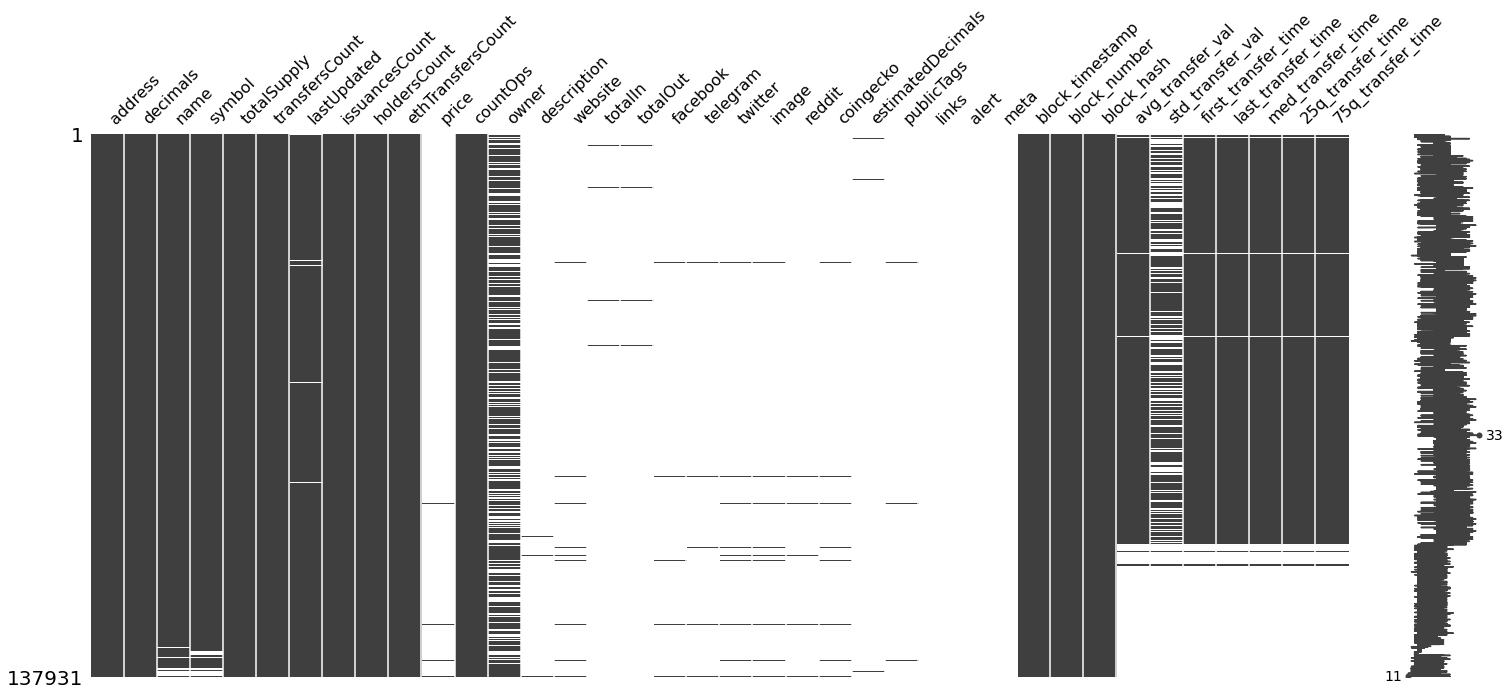

In [348]:
#show density of missing features
msno.matrix(df)
plt.show()

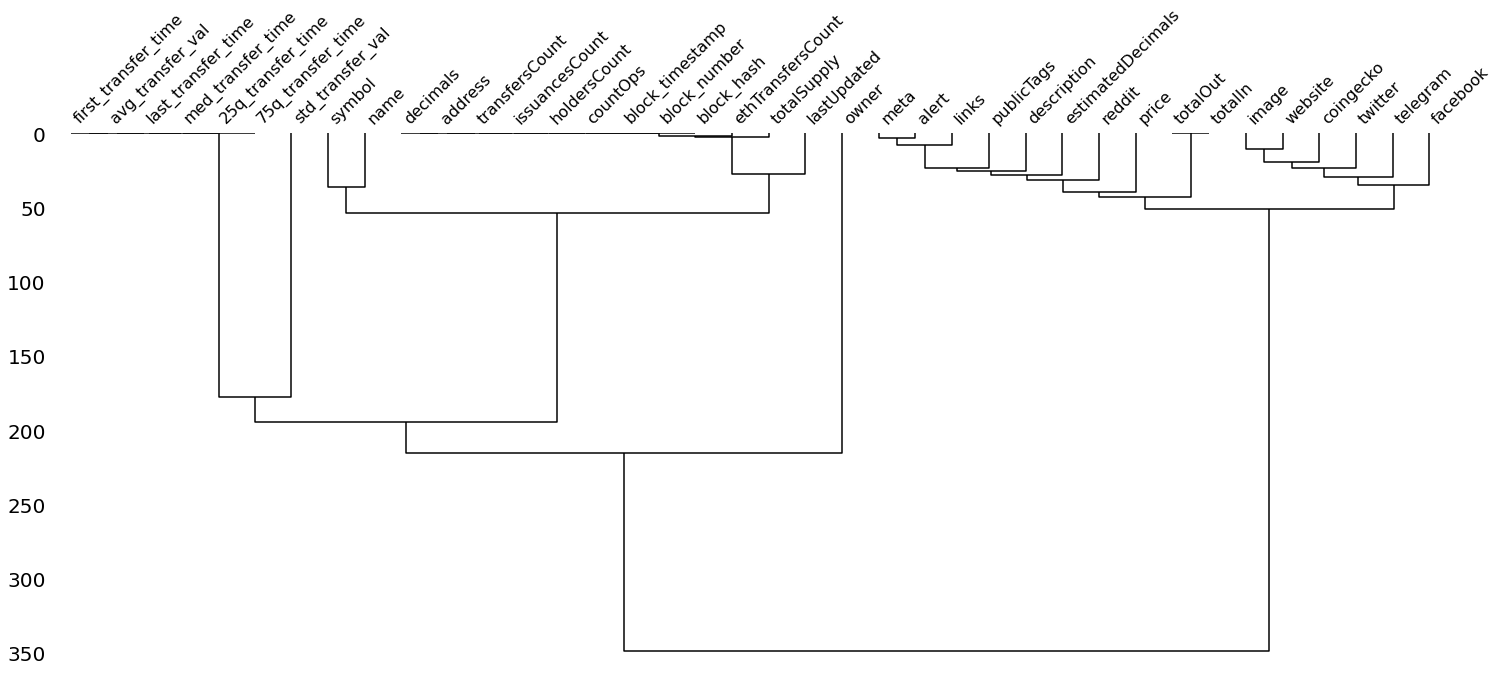

In [349]:
#dendogram based on null features
msno.dendrogram(df)
plt.show()